In [3]:
import pandas as pd
from prophet import Prophet
import sys
sys.path.insert(1, '../utils/')
from preprocessing import preprocess_cosumo
#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import datetime as dt

In [60]:
df = pd.read_csv('../data/consumo_material_clean_with_category.csv', parse_dates=['FECHAPEDIDO'])
df = preprocess_cosumo(df)[['STACKS_COMPRATS','FECHAPEDIDO']]
df_train = df[df['FECHAPEDIDO']<dt.datetime(year=2023,month=1,day=1)]
df_test = df[df['FECHAPEDIDO']>=dt.datetime(year=2023,month=1,day=1)]
df_train.rename(columns={'FECHAPEDIDO':'ds','STACKS_COMPRATS':'y'}, inplace=True)
df_test.rename(columns={'FECHAPEDIDO':'ds','STACKS_COMPRATS':'y'}, inplace=True)


asjfkjdsfljds


C:\Users\berna\AppData\Local\Temp\ipykernel_13576\321314653.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\berna\AppData\Local\Temp\ipykernel_13576\321314653.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df_train

,y,ds
1,4,2016-01-02
2,4,2016-01-02
3,2,2016-01-02
4,1,2017-01-02
5,8,2017-01-02
...,...,...
15673,61,2022-10-31
15674,42,2022-10-31
15675,4,2022-10-31
15676,4,2022-10-31


In [62]:
X = df_train['ds']
y = df_train['y']
X_test = df_test['ds']
y_test = df_test['y']

In [63]:
df_train

,y,ds
1,4,2016-01-02
2,4,2016-01-02
3,2,2016-01-02
4,1,2017-01-02
5,8,2017-01-02
...,...,...
15673,61,2022-10-31
15674,42,2022-10-31
15675,4,2022-10-31
15676,4,2022-10-31


In [64]:
# train and fit "EL PROFETA"
m = Prophet()
m.fit(df_train)

01:35:04 - cmdstanpy - INFO - Chain [1] start processing
01:35:05 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
future = m.make_future_dataframe(periods=365, freq='D')
print(len(future[future['ds'] <= dt.datetime(year=2023, month=10, day=31)]['ds'].unique()))
len(df['FECHAPEDIDO'].unique())

2256


2168

In [87]:
future

,ds
0,2015-01-04
1,2015-01-06
2,2015-01-07
3,2015-01-09
4,2015-01-10
...,...
2311,2023-12-26
2312,2023-12-27
2313,2023-12-28
2314,2023-12-29


In [83]:
future = df_test['ds']
future

0       2023-01-01
31      2023-01-02
32      2023-01-02
33      2023-01-02
34      2023-01-02
           ...    
15692   2023-10-31
15693   2023-10-31
15694   2023-10-31
15695   2023-10-31
15696   2023-10-31
Name: ds, Length: 2340, dtype: datetime64[ns]

In [82]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

KeyError: 'ds'

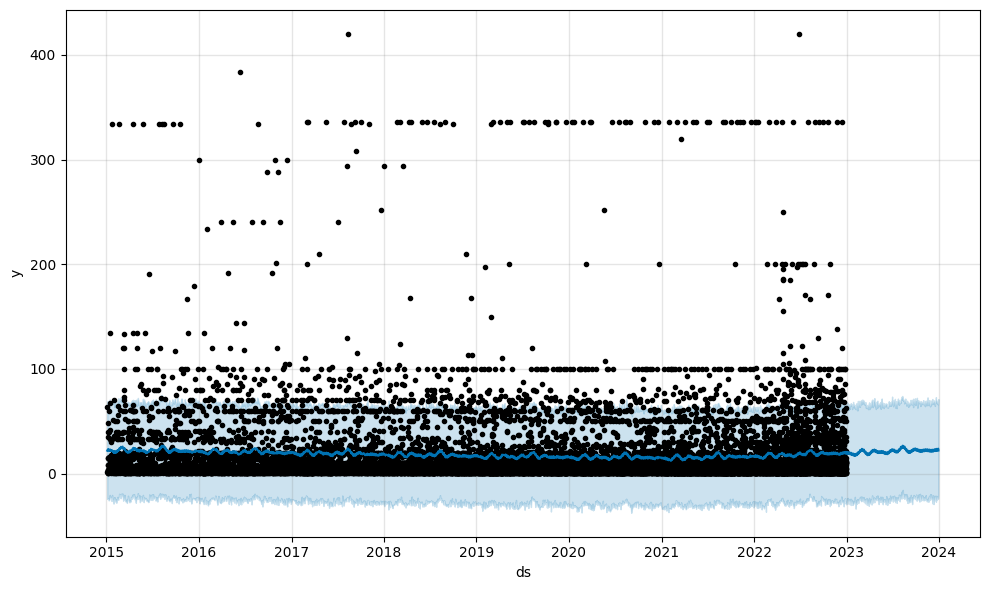

In [36]:
fig1 = m.plot(forecast)

In [37]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [40]:
# metrics for TRAIN
mse = mean_squared_error(y, forecast['yhat'][:-365])
print('mse: ', mse)
mae = mean_absolute_error(y, forecast['yhat'][:-365])
print('mae: ', mae)
r2 = r2_score(y, forecast['yhat'][:-365])
print('r2: ', r2)

ValueError: Found input variables with inconsistent numbers of samples: [13358, 1951]